<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ams182/blob/main/TecMty_Regresion_lineal_polinomial_A01104775.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models




- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Librerias
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import (LinearRegression, Lasso, Ridge)
from sklearn.model_selection import train_test_split
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

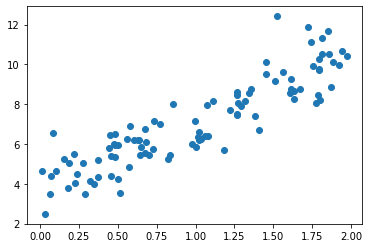

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [6]:
#X_fit[]

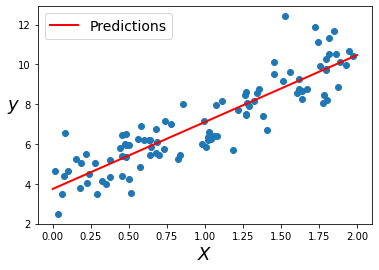

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [12]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

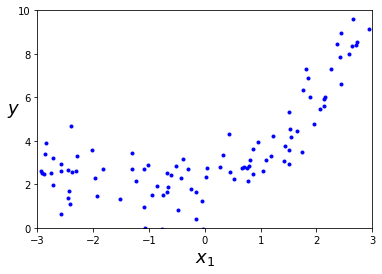

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

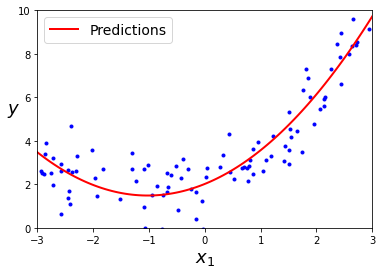

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.


Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

    Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
    
    Regresión Lineal.
        Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
    
    Regresión Polinomial.
        Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
    
    Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
    
    Finalmente grafica :
        MAE (de los cuatro métodos)
        R2 (de los cuatro métodos)
    
    Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?


In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
print(df.sample(5))
X = df[['Number of Units']]
y = df['Manufacturing Cost']


#Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80,random_state=0,)

print('\ndatos de x de entrenamiento: ' + str(X_train.shape[0]) + '\n' +
      'datos de x de prueba: ' + str(X_test.shape[0]) + '\n' +                                                
      'datos de y de entrenamiento: ' + str(y_train.shape[0]) + '\n' +
      'datos de y de prueba: ' + str(y_test.shape[0]) + '\n' )  
                                      

     Number of Units  Manufacturing Cost
968         7.065653           27.804027
212         3.372115           41.127212
416         4.194513           43.832711
677         5.068888           41.225741
550         4.604122           37.569764

datos de x de entrenamiento: 800
datos de x de prueba: 200
datos de y de entrenamiento: 800
datos de y de prueba: 200




La ecuación de la regresión es: 

y = 67.51699929483895 + [-6.12396253] * X 

Los errores son: 

Error medio Absoluto (MAE): 4.945478137356366
Root Mean Squared Error: 6.834772415313126
r2_score 0.5836439303438314




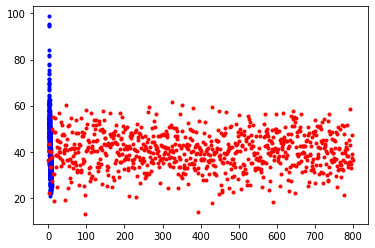

In [23]:
# Regresión Lineal:
# Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


linear_reg = LinearRegression(fit_intercept=True)
# se ajusta el modelo
linear_reg.fit(X_train, y_train)
#se crean los pronosticos
y_pred = linear_reg.predict(X_train)

#Ecuación:
coef1 = linear_reg.coef_
inter =  linear_reg.intercept_

print('\nLa ecuación de la regresión es: \n\n' +
      'y = ' + str(inter) + ' + ' + str(coef1) + ' * X \n')

# metricas de error
print('Los errores son: \n\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))
print('\n')
plt.plot(X_train,y_train,'b.')
plt.plot(y_pred,'r.')




La ecuación de la regresión es: 

y = 90.69281709517362 + -17.353778088306495 * X1 
1.2434511496285978 * X2 

Los errores son: 

Error medio Absoluto (MAE): 4.559603921954942
Root Mean Squared Error: 6.132220877099768
r2_score: 0.6648398601459298




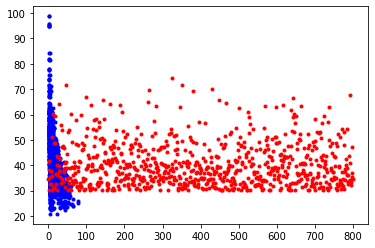

In [24]:
# Regresión Polinomial.
# Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

#modelo
lin_reg = LinearRegression(fit_intercept=True)

#Se transforma X de manera polinomica
X_poly = poly_features.fit_transform(X_train)

#se ajusta el modelo con la X polinomica
lin_reg.fit(X_poly, y_train)

#se crean los pronosticos
y_pred_poly = lin_reg.predict(X_poly)

#Ecuación
coef2 = lin_reg.coef_
inter =  lin_reg.intercept_

print('\nLa ecuación de la regresión es: \n\n' +
      'y = ' + str(inter) + ' + ' + str(coef2[0]) + ' * X1 \n'+ str(coef2[1]) + ' * X2 \n')

# metricas de error
print('Los errores son: \n\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_poly)))
print('r2_score:',r2_score(y_train, y_pred_poly))

print('\n')

plt.plot(X_poly,y_train,'b.')
plt.plot(y_pred_poly,'r.')


La ecuación de la regresión es: 

y = 64.97563883179828 + [-5.55125372] * X 

Los errores son: 

Error medio Absoluto (MAE): 4.916808074131439
Root Mean Squared Error: 6.87654148345883
r2_score 0.5785394604806035




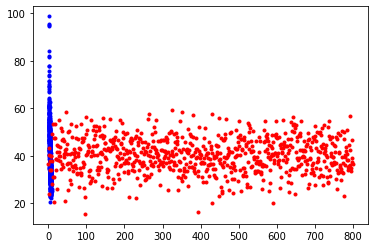

In [25]:
# Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

# Regresión Lineal:
# Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


l = Lasso()
# se ajusta el modelo
l.fit(X_train, y_train)
#se crean los pronosticos
y_pred_l = l.predict(X_train)

#Ecuación:
coefl = l.coef_
inter =  l.intercept_

print('\nLa ecuación de la regresión es: \n\n' +
      'y = ' + str(inter) + ' + ' + str(coefl) + ' * X \n')

# metricas de error
print('Los errores son: \n\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_l ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_l)))
print('r2_score',r2_score(y_train, y_pred_l))
print('\n')
plt.plot(X_train,y_train,'b.')
plt.plot(y_pred_l,'r.')



La ecuación de la regresión es: 

y = 64.97563883179828 + [-6.1195816] * X 

Los errores son: 

Error medio Absoluto (MAE): 4.945089511267717
Root Mean Squared Error: 6.834774866877012
r2_score 0.5836436316583375




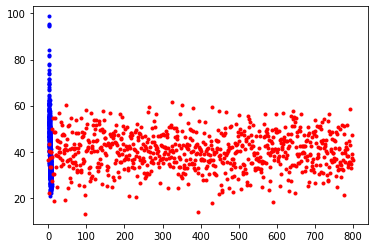

In [26]:
# Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

# Regresión Lineal:
# Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


r = Ridge()
# se ajusta el modelo
r.fit(X_train, y_train)
#se crean los pronosticos
y_pred_r = r.predict(X_train)

#Ecuación:
coefr = r.coef_
inter =  l.intercept_

print('\nLa ecuación de la regresión es: \n\n' +
      'y = ' + str(inter) + ' + ' + str(coefr) + ' * X \n')

# metricas de error
print('Los errores son: \n\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_r ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_r)))
print('r2_score',r2_score(y_train, y_pred_r))
print('\n')
plt.plot(X_train,y_train,'b.')
plt.plot(y_pred_r,'r.')

In [27]:
maes = list()
r2s = list()
nombres = ['Lineal', 'Poly', 'Lasso', 'Rdige' ] 

# metricas de error Lineal
maes.append(metrics.mean_absolute_error(y_train, y_pred))
r2s.append(r2_score(y_train, y_pred))
# metricas de error poly
maes.append(metrics.mean_absolute_error(y_train, y_pred_poly))
r2s.append(r2_score(y_train, y_pred_poly))
# metricas de error Lasso
maes.append(metrics.mean_absolute_error(y_train, y_pred_l ))
r2s.append(r2_score(y_train, y_pred_l))
# metricas de error Ridge
maes.append(metrics.mean_absolute_error(y_train, y_pred_r ))
r2s.append(r2_score(y_train, y_pred_r))

# DF errores
errores_list = list(zip(nombres, maes, r2s))
errores_df = pd.DataFrame(errores_list)
errores_df  = errores_df.rename({0: 'Modelos',1: 'MAEs', 2: 'R2s'}, axis=1)
errores_df.set_index('Modelos',inplace=True)

errores_df

,MAEs,R2s
Modelos,,
Lineal,4.945478,0.583644
Poly,4.559604,0.664840
Lasso,4.916808,0.578539
Rdige,4.945090,0.583644


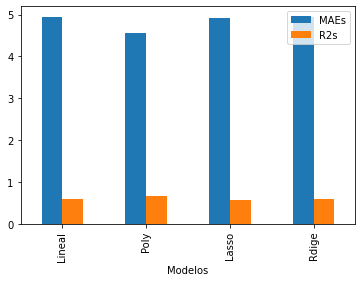

In [28]:
errores_df.plot.bar()

Explica tus resultados, que método conviene más a la empresa, ¿por que?
El polinómico o bien uno multivariable, debido a como estan los datos estos se ajustan mejor a una curva.

¿que porcentajes de entrenamiento y evaluación usaste?
80, 20 ya que es el estandar.

¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
Todos son un poco bajos con base en las métricas usadas, el mejor es el poly debido a como se distribuyen los datos

                Mae      R2
*********
Lineal:    	4.945478, 	0.583644
*********
Poly: 	      4.559604, 	0.664840
*********
Lasso:     	4.916808, 	0.578539
*********
Rdige:      	4.945090, 	0.583644

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [31]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


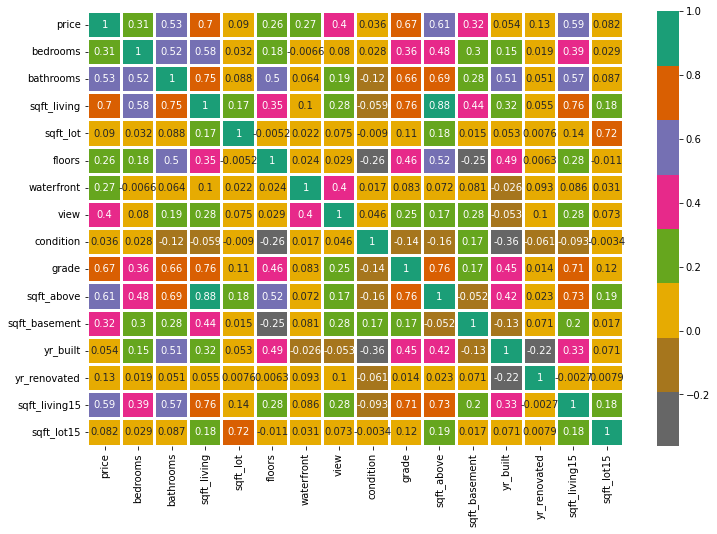

In [33]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [34]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Ejercicio 2. Regresión múltiple.

Encuentra el mejor regresor para los datos de las casas:

    Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
    Regresión Múltiple Lineal.
        Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.
    Regresión Múltiple Polinomial.
        Realiza la  regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.
    Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.
    Finalmente grafica :
        MAE (de los cuatro métodos)
        R2 (de los cuatro métodos)
    Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
    Agrega las conclusiones



La ecuación de la regresión es: 

y = 6151359.262740902 + 
 + -38200.80483396449 * X1
 + 41466.13802863147 * X2
 + 107.99258400093822 * X3
 + 0.0171356997161638 * X4
 + 31691.691313553605 * X5
 + 552691.0233181857 * X6
 + 41249.32275203692 * X7
 + 21222.144256109055 * X8
 + 119493.21585367358 * X9
 + 47.77502707057647 * X10
 + 60.21755653483342 * X11
 + -3550.9021573131968 * X12
 + 13.260221498272529 * X13
 + 29.00592838751345 * X14
 + -0.5481326027838804 * X15

Los errores son: 

Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833




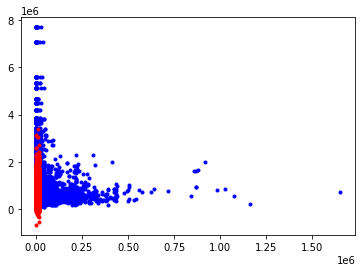

In [36]:
# Regresión Lineal:
# Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
i=1

linear_reg = LinearRegression(fit_intercept=True)
# se ajusta el modelo
linear_reg.fit(X_train, y_train)
#se crean los pronosticos
y_pred = linear_reg.predict(X_train)

#Ecuación:
coef = linear_reg.coef_
inter =  linear_reg.intercept_

print('\nLa ecuación de la regresión es: \n\n' +
      'y = ' + str(inter[0]) + ' + '  )

for elemento in linear_reg.coef_[0]: 
  print(' + '+ str(elemento) + ' * X' + str(i)) 
  i=i+1

# metricas de error
print('\nLos errores son: \n\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))
print('\n')
plt.plot(X_train,y_train,'b.')
plt.plot(y_pred,'r.')


La ecuación de la regresión es: 

y = 80227028.3104757 + 
 + 933912.8339811402 * X1
 + -1093307.2988890775 * X2
 + -456.44993232234583 * X3
 + -27.868628841106222 * X4
 + -2074072.3849893238 * X5
 + -3954318.699668158 * X6
 + -288638.0258699706 * X7
 + 558697.5702310547 * X8
 + 1098645.1037843083 * X9
 + -219.75841511336466 * X10
 + -382.0342717188405 * X11
 + -85963.09077123865 * X12
 + -2953.515948116647 * X13
 + 3999.657097775203 * X14
 + -34.01063159901658 * X15
 + 957.5416964104098 * X16
 + 7499.581904143857 * X17
 + -13.796946593364062 * X18
 + -0.018492669492754743 * X19
 + 8576.995692417637 * X20
 + -11496.58932158693 * X21
 + -306.5888999158299 * X22
 + -5246.2883559460415 * X23
 + -5367.880649994306 * X24
 + -1.2075766861609267 * X25
 + -14.606818153087893 * X26
 + -467.0994514251412 * X27
 + -9.131915185241255 * X28
 + 17.280064173510084 * X29
 + 0.21550019812278265 * X30
 + -9634.29892181688 * X31
 + 15.387917161093512 * X32
 + -0.13584236899568225 * X33
 + -25906.72934204

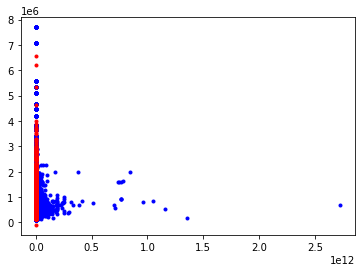

In [37]:
# Regresión Polinomial.
# Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
i=1
#modelo
lin_reg = LinearRegression(fit_intercept=True)

#Se transforma X de manera polinomica
X_poly = poly_features.fit_transform(X_train)

#se ajusta el modelo con la X polinomica
lin_reg.fit(X_poly, y_train)

#se crean los pronosticos
y_pred_poly = lin_reg.predict(X_poly)

#Ecuación
coef = lin_reg.coef_
inter =  lin_reg.intercept_

print('\nLa ecuación de la regresión es: \n\n' +
      'y = ' + str(inter[0]) + ' + '  )

for elemento in coef[0]: 
  print(' + '+ str(elemento) + ' * X' + str(i)) 
  i=i+1

# metricas de error
print('\nLos errores son: \n\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_poly)))
print('r2_score:',r2_score(y_train, y_pred_poly))

print('\n')

plt.plot(X_poly,y_train,'b.')
plt.plot(y_pred_poly,'r.')


La ecuación de la regresión es: 

y = 6151280.113900406 + 
los coeficientes son:  [-3.81995345e+04  4.14618568e+04  2.93483624e+02  1.71281822e-02
  3.16871411e+04  5.52541108e+05  4.12549654e+04  2.12193902e+04
  1.19491837e+05 -1.37711342e+02 -1.25271591e+02 -3.55085005e+03
  1.32628460e+01  2.90053298e+01 -5.48136075e-01]

Los errores son: 

Error medio Absoluto (MAE): 139269.34538286336
Root Mean Squared Error: 214234.88264551814
r2_score 0.6529196641143418




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


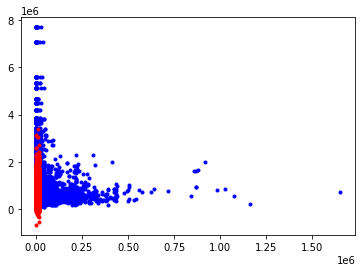

In [38]:
# Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
i=1

l = Lasso(max_iter=100)
# se ajusta el modelo
l.fit(X_train, y_train)
#se crean los pronosticos
y_pred_l = l.predict(X_train)

#Ecuación:
coefl = l.coef_
inter =  l.intercept_

print('\nLa ecuación de la regresión es: \n\n' +
      'y = ' + str(inter[0]) + ' + '  )

print('los coeficientes son: ', coefl)

# metricas de error
print('\nLos errores son: \n\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_l ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_l)))
print('r2_score',r2_score(y_train, y_pred_l))
print('\n')
plt.plot(X_train,y_train,'b.')
plt.plot(y_pred_l,'r.')



La ecuación de la regresión es: 

y = 6151280.113900406 + 
 + -38219.22654176283 * X1
 + 41450.96555959539 * X2
 + 108.01395133287413 * X3
 + 0.01693182390572198 * X4
 + 31689.15737359782 * X5
 + 548258.3326896041 * X6
 + 41455.92353377995 * X7
 + 21226.434653809076 * X8
 + 119470.56803887544 * X9
 + 47.80668777180269 * X10
 + 60.20656045223188 * X11
 + -3550.5012897181414 * X12
 + 13.317188962676019 * X13
 + 28.98519872155609 * X14
 + -0.5479985117653494 * X15

Los errores son: 

Error medio Absoluto (MAE): 139269.23633236173
Root Mean Squared Error: 214235.17316414206
r2_score 0.652918722779591




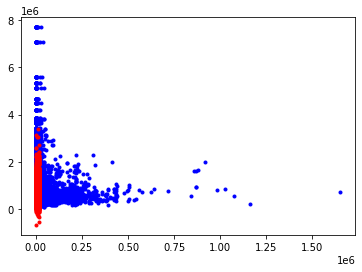

In [39]:
# Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
i=1


r = Ridge()
# se ajusta el modelo
r.fit(X_train, y_train)
#se crean los pronosticos
y_pred_r = r.predict(X_train)

#Ecuación:
coefr = r.coef_
inter =  l.intercept_

print('\nLa ecuación de la regresión es: \n\n' +
      'y = ' + str(inter[0]) + ' + '  )

for elemento in coefr[0]: 
  print(' + '+ str(elemento) + ' * X' + str(i)) 
  i=i+1

# metricas de error
print('\nLos errores son: \n\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_r ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_r)))
print('r2_score',r2_score(y_train, y_pred_r))
print('\n')
plt.plot(X_train,y_train,'b.')
plt.plot(y_pred_r,'r.')

In [40]:
maes = list()
r2s = list()
nombres = ['Lineal', 'Poly', 'Lasso', 'Rdige' ] 

# metricas de error Lineal
maes.append(metrics.mean_absolute_error(y_train, y_pred))
r2s.append(r2_score(y_train, y_pred))
# metricas de error poly
maes.append(metrics.mean_absolute_error(y_train, y_pred_poly))
r2s.append(r2_score(y_train, y_pred_poly))
# metricas de error Lasso
maes.append(metrics.mean_absolute_error(y_train, y_pred_l ))
r2s.append(r2_score(y_train, y_pred_l))
# metricas de error Ridge
maes.append(metrics.mean_absolute_error(y_train, y_pred_r ))
r2s.append(r2_score(y_train, y_pred_r))

# DF errores
errores_list = list(zip(nombres, maes, r2s))
errores_df = pd.DataFrame(errores_list)
errores_df  = errores_df.rename({0: 'Modelos',1: 'MAEs', 2: 'R2s'}, axis=1)
errores_df.set_index('Modelos',inplace=True)

errores_df

,MAEs,R2s
Modelos,,
Lineal,139269.329391,0.652920
Poly,123190.808610,0.746952
Lasso,139269.345383,0.652920
Rdige,139269.236332,0.652919


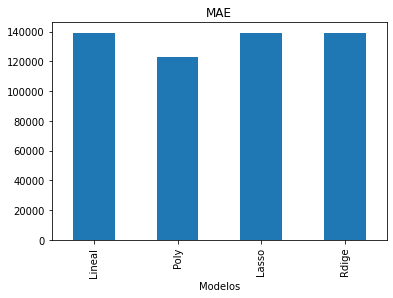

In [41]:
errores_df.MAEs.plot.bar(title='MAE')

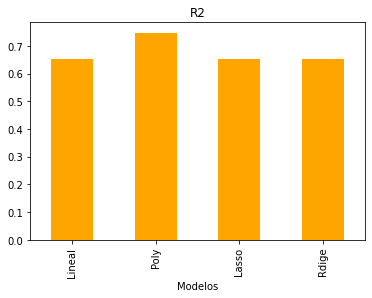

In [42]:
errores_df.R2s.plot.bar(color='orange',title='R2')

Explica tus resultados, que método se aproxima mejor, ¿por que?, 
De nueva cuenta el Polinomial, aunque en general todos presentan mejoria debido al incremento de la información.

¿que porcentajes de entrenamiento y evaluación usaste? 
80-20 como es la costumbre. 

¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
El mejor vuelve a ser el polinomial, mejora mucho respecto a los anteriores debido a su ajuste.


               MAEs       	R2s
Modelos 	
*************	
Lineal: 	139269.329391, 	0.652920
*************	
Poly: 	123190.808610, 	0.746952
*************	
Lasso: 	139269.345383, 	0.652920
*************	
Rdige: 	139269.236332, 	0.652919








Con base en los datos oroginales, y dos enfoques, se observa que una curva se va a ajustar mejor que una recta para modelar la variable de interés.
Asi mismo se puede asumir que de manera general mientras mas información mejor interpretación puede hacer el modelo de la misma.

Fuentes:

1. Material provisto en clase, recuperado el 07/11/2022 de: https://colab.research.google.com/drive/1yMk887XcxVsdgdkl--sUO2y_k2m9cB1s?usp=sharing





